<a href="https://colab.research.google.com/github/giovannidispoto/machine-and-deep-learning-playground/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [120]:
!unzip /gdrive/MyDrive/diabetes.zip

Archive:  /gdrive/MyDrive/diabetes.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: diabetes.csv            


In [174]:
import pandas as pd
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


features = pd.read_csv('diabetes.csv')
labels = features['Outcome']

features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [175]:
features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Train-Test split + handling missing values with medians

Text(0.5, 1.0, 'Test label hist')

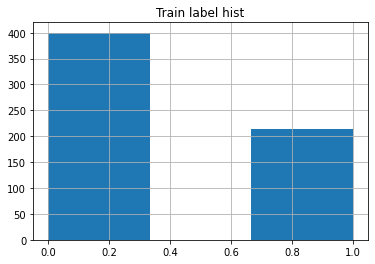

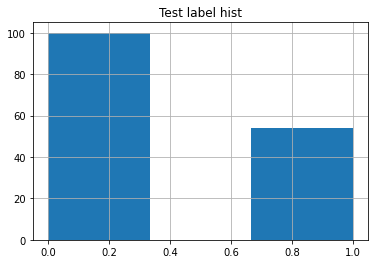

In [176]:
train, test = train_test_split(features, test_size=0.2, random_state=42, shuffle=True, stratify=labels)
train_outcome = train.Outcome
train_features = train.drop(columns=['Outcome'])

# Subtracting one in order to have -1 in missing values and having a stronger indicator for that. 
train_features = train_features.replace(0,train_features['Insulin'].median())
train_features = train_features.replace(0,train_features['SkinThickness'].median())
train_features = train_features.replace(0,train_features['BMI'].median())
train_features= train_features.replace(0,train_features['BloodPressure'].median())
train_features = train_features.replace(0,train_features['Glucose'].median())


test_outcome = test.Outcome
test_features = test.drop(columns=['Outcome'])

test_features = test_features.replace(0,test_features['Insulin'].median())
test_features = test_features.replace(0,test_features['SkinThickness'].median())
test_features = test_features.replace(0,test_features['BMI'].median())
test_features = test_features.replace(0,test_features['BloodPressure'].median())
test_features = test_features.replace(0,test_features['Glucose'].median())

#plot histogram train-test
train.hist(column='Outcome', bins=3)
plt.title("Train label hist")

test.hist(column='Outcome', bins=3)
plt.title("Test label hist")

In [177]:
train_features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,9.425896,121.172638,70.960098,32.320033,97.794788,32.566938,0.477428,33.366450
std,12.807897,30.705535,13.669113,10.284998,94.879796,6.892483,0.330300,11.833438
min,1.000000,40.500000,24.000000,7.000000,15.000000,18.200000,0.084000,21.000000
25%,2.000000,99.000000,62.500000,25.000000,40.500000,27.625000,0.245000,24.000000
50%,5.000000,117.000000,72.000000,34.000000,40.750000,32.400000,0.382500,29.000000
75%,8.000000,140.000000,80.000000,40.500000,130.000000,36.800000,0.639250,41.000000
max,40.500000,199.000000,122.000000,99.000000,744.000000,67.100000,2.329000,81.000000



# Plotting the features



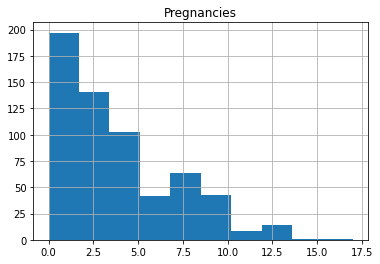

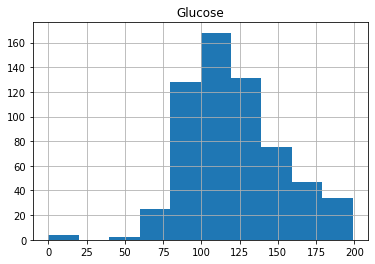

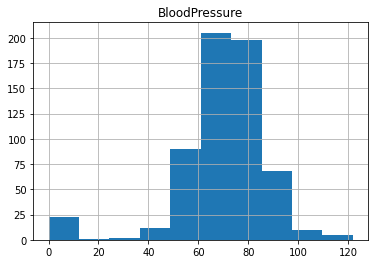

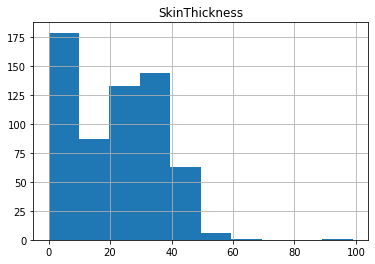

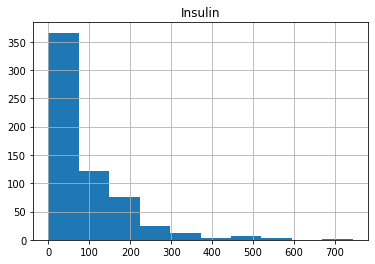

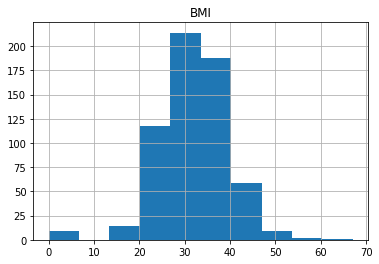

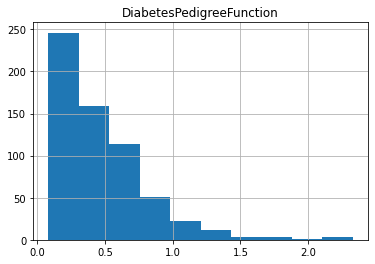

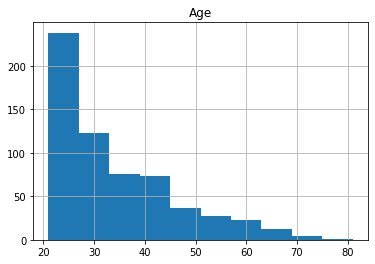

In [178]:
for column in train_features.columns:
  train.hist(column=column)

In [179]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(random_state=1234)
svclassifier.fit(train_features,train_outcome)

SVC(random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


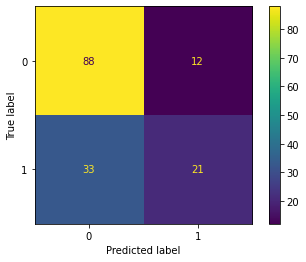

In [180]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features , test_outcome)  
plt.show() 

In [181]:
# 2. Standarize data with RobustScaler transformation
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(train_features)
features_list = train_features.columns.tolist()
train_features_zscore = transformer.transform(train_features)
#Transform the numpy array back to a dataframe
train_features = pd.DataFrame(data=train_features_zscore, columns=features_list)

# adapt test set
test_features = transformer.transform(test_features)
test_features = pd.DataFrame(data=test_features, columns=features_list)

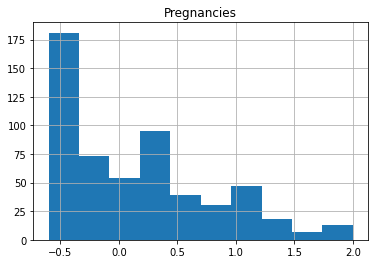

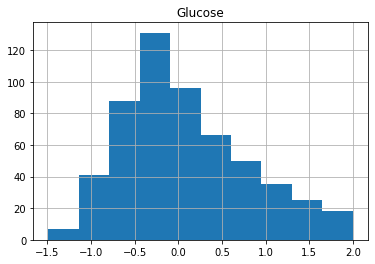

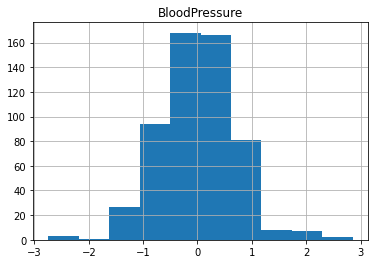

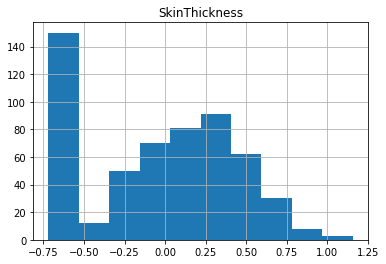

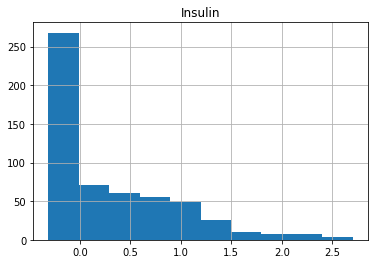

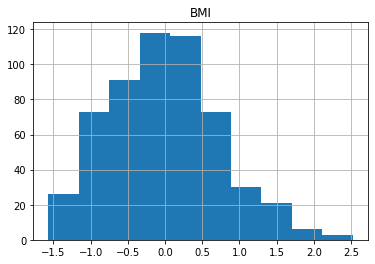

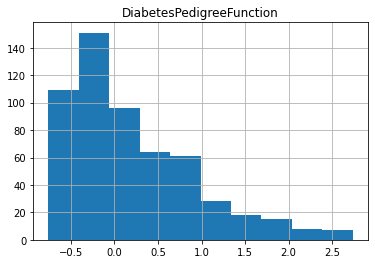

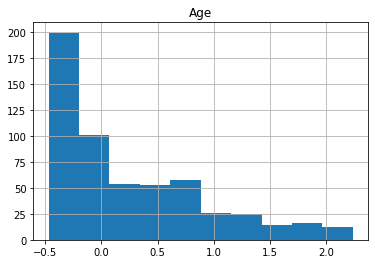

In [182]:
for column in train_features_or.columns:
  train_features_or.hist(column=column)

In [183]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(C=1.0,
              kernel='rbf', # linear ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
              degree=6,
              gamma='scale',
              coef0=0.0, 
              shrinking=True,
              probability=False,
              tol=0.001,
              cache_size=200, 
              class_weight=None, # vs balanced
              verbose=False,
              max_iter=- 1,
              decision_function_shape='ovr',
              break_ties=False,
              random_state=1234)
svclassifier.fit(train_features,train_outcome)

SVC(degree=6, random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


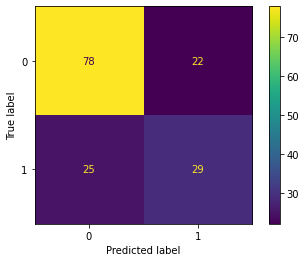

In [184]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features , test_outcome)  
plt.show() 

The FN improves a little bit, but the model does not perform that much well.

**Features Selection**

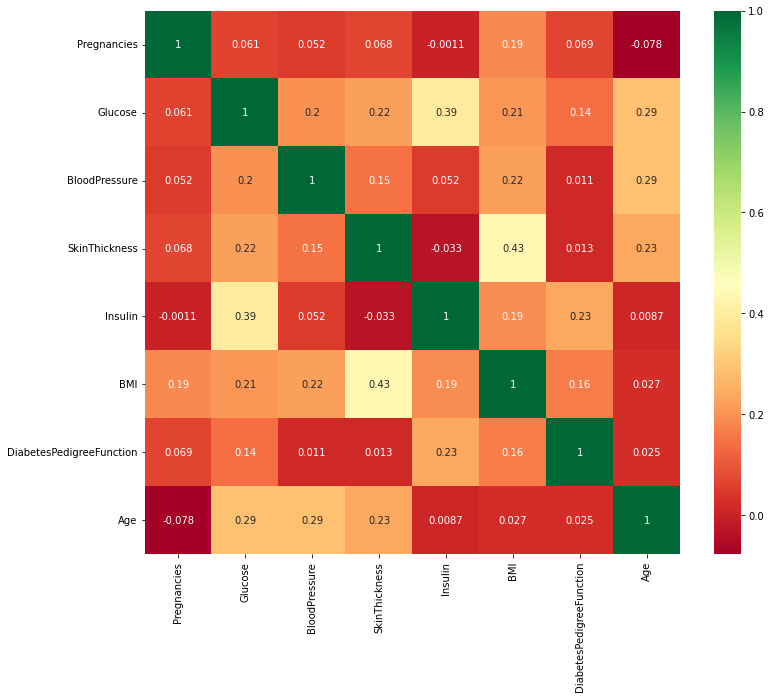

In [135]:
import seaborn as sns

plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(train_features.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Trying to fit model by removing SkinThickness and Insulin features since they are higly correlated to someother features.

In [191]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(C=1.0,
              kernel='rbf', # linear ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
              degree=10,
              gamma='scale',
              coef0=0.0, 
              shrinking=True,
              probability=False,
              tol=0.001,
              cache_size=200, 
              class_weight='balanced', # vs balanced
              verbose=False,
              max_iter=- 1,
              decision_function_shape='ovr',
              break_ties=False,
              random_state=1234)
svclassifier.fit(train_features.drop(columns=['SkinThickness', 'Insulin']),train_outcome)

SVC(class_weight='balanced', degree=10, random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


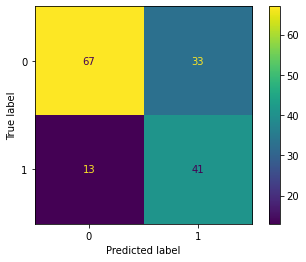

In [192]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features.drop(columns=['SkinThickness', 'Insulin']) , test_outcome)  
plt.show() 

In [197]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=1234, class_weight='balanced', max_depth=100, n_estimators=300)
randomForest.fit(train_features.drop(columns=['SkinThickness', 'Insulin']), train_outcome)

RandomForestClassifier(class_weight='balanced', max_depth=100, n_estimators=300,
                       random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


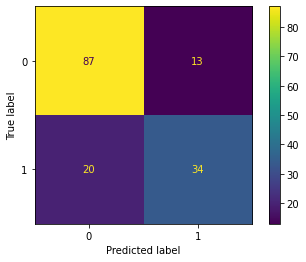

In [198]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomForest, test_features.drop(columns=['SkinThickness', 'Insulin']), test_outcome)  
plt.show() 

In [199]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=1234, n_estimators=100)
ada.fit(train_features.drop(columns=['SkinThickness', 'Insulin']), train_outcome)

AdaBoostClassifier(n_estimators=100, random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


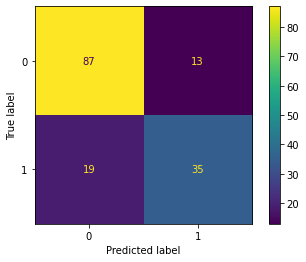

In [200]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ada, test_features.drop(columns=['SkinThickness', 'Insulin']), test_outcome)  
plt.show() 

In [201]:
from sklearn.metrics import classification_report
print(classification_report(test_outcome, svclassifier.predict(test_features.drop(columns=['SkinThickness', 'Insulin']))))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74       100
           1       0.55      0.76      0.64        54

    accuracy                           0.70       154
   macro avg       0.70      0.71      0.69       154
weighted avg       0.74      0.70      0.71       154



In [202]:
from sklearn.metrics import classification_report
print(classification_report(test_outcome, randomForest.predict(test_features.drop(columns=['SkinThickness', 'Insulin']))))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [203]:
from sklearn.metrics import classification_report
print(classification_report(test_outcome, ada.predict(test_features.drop(columns=['SkinThickness', 'Insulin']))))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       100
           1       0.73      0.65      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

